# Linear Regression - Ridge Regression   
-------------------------

_Authors: Khal Makhoul, W.P.G.Peterson_  

## Project Guide  

--------------------
- [Project Overview](#overview)  
- [Data Review](#data)  
- [Coding Ridge Regression](#code)
- [Ridge Regression in `sklearn`](#sklearn)  

<a id = "overview"></a>
## Project Overview  
-------------
#### EXPECTED TIME 2.5 HRS  

This assignment will test your ability to code your own version of ridge-regularized regression in `Python`. This assignment draws upon and presupposed the knowledge found in the lectures for Week 2. If ever a theoretical questions arises as to "why" we are doing something, please refer back to those lectures.  

The assignment also builds upon the work performed in assignment 1 "*Linear Regression - Least Squares*". The data used will be the same. Though the last assignment tested your ability to read data into `Pandas` from a `.csv`. Those fundamental processes will not be directly tested here.

In coding Ridge Regression you will be asked to:  
- Mean center target variable and mean center / standardize observation  
- Calculate Ridge Regression weights using linear algebra
- Create a  hyperparameter tuning process   

**Motivation**: Ridge Regression offers a way to mitigate some of the weaknesses of Least Squares Linear Regression to build more robust models.  

**Objectives**: This assignmet will -  

- Test `Python` competency and mathematical understandings of Ridge Regression
- Begin to introduce the concept of hyper-parameter tuning  

**Problem**: Using housing data, we will attempt to predict house price using living area with a regression model.  

**Data**: Data comes from [Kaggle's House Prices Dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).  

See above link for Description of data.

<a id = "data"></a>  
### Data Exploration

Below provides a review of the "Housing" dataset.

In [2]:
### This cell imports the necessary modules and sets a few plotting parameters for display

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)  

### Read in the data
tr_path = '../resource/asnlib/publicdata/train.csv'
test_path = '../resource/asnlib/publicdata/test.csv'

data = pd.read_csv(tr_path)  

### The .head() function shows the first few lines of data for perspecitve
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Question 1

In [3]:
### GRADED
### Which column has the most "null" values? assign name as string to ans1.
### ### CAPITALIZATION/SPELLING MATTERS e.g. 'Street' != 'street'
### How many nulls are in that column? assign number as int to ans2
### YOUR ANSWER BELOW
nuls = pd.DataFrame(data.isnull().sum().sort_values(ascending =False))
#nuls
ans1 = 'PoolQC'
ans2 = 1453

In [4]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


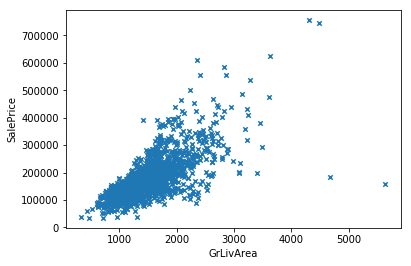

In [5]:
data.plot('GrLivArea', 'SalePrice', kind = 'scatter', marker = 'x');

#### Question 2

In [6]:
### GRADED
### In building regressions below, a subset of our data will be used.

### Practice subsetting a DataFrame below.
### Create a DataFrame only containing the "Street" and "Alley" columns from 
### the `data` DataFrame.

### Assign to 'ans1'
### YOUR ANSWER BELOW
columns=['Street', 'Alley']
ans1 = data[columns].copy()

In [7]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


<a id = "code"></a>
### Coding Ridge Regression   

#### Preprocessing
Before implementing Ridge Regression, it is important to mean-center our target variable and mean-center and standardize observations. We will do this according to the following:  
#### Mean Center Target
$$y_{cent} = y_0 - \bar{y}$$

#### Standardize Observations
$$X_{std} = \frac{X_0-\bar{X}}{s_{X}}$$

Where $\bar{X}$ is the sample mean of X and $s_{X}$ is the sample standard deviation of X.  

NOTE: The sample standard deviation should be calculated with 0 "Delta Degrees of Freedom"

#### Question 3:

In [8]:
### GRADED
### Why are the centering / standardization transformations described above important for ridge regression?
### 'a') Regression works best when values are unitless
### 'b') The transformations makes the regression more interpretable
### 'c') Ridge penalizes large coefficients; the transformations make the coefficients of similar scales
### 'd') It isn't important

### Assign character associated with your choice as a string to ans1
### YOUR ANSWER BELOW

ans1 = 'c'

In [9]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


#### Question 4:
$$X_{std} = \frac{X_0-\bar{X}}{s_{X}}$$  

NOTE: The sample standard deviation should be calculated with 0 "Delta Degrees of Freedom".  
If your answer does not match the example answer, check the default degrees of freedom in your standard deviation function.

In [10]:
### GRADED
### Code a function called "standardize" 
### ACCEPT one input, a list of numbers
### RETURN a list where those values have been standardized.

### To standardize, subtract the mean of the list and divide by standard deviation.
### Please use np.std for calculating standard deviation
### YOUR ANSWER BELOW

def standardize( num_list):
    """
    Standardize the given list of numbers
    
    Positional arguments:
        num_list -- a list of numbers
    
    Example:
        num_list = [1,2,3,3,4,4,5,5,5,5,5]
        nl_std = standardize(num_list)
        print(np.round(nl_std,2))
        #--> np.array([-2.11, -1.36, -0.61, -0.61,  
                0.14,  0.14,  0.88,  0.88,  0.88,
                0.88,  0.88])
    
    NOTE: the sample standard deviation should be calculated with 0 "Delta Degrees of Freedom"
    """
    num_list_mean = np.mean(num_list)
    num_list_std = np.std(num_list)
    result_list = [(item-num_list_mean)/num_list_std for item in num_list]
    print(result_list)
    return result_list

In [11]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


Below we will create a function which will preprocess  our data by performing:
* mean subtraction from $y$,
* dimension standardization for $x$.

Both according to the equations set out below.

#### Mean Center Target
$$y_{cent} = y_0 - \bar{y}$$

#### Standardize Observations
$$X_{std} = \frac{X_0-\bar{X}}{s_{X}}$$  

NOTE: the sample standard deviation should be calculated with 0 "Delta Degrees of Freedom"  
If your answer does not match the example answer, check the default degrees of freedom in your standard deviation function.

#### Question 5

In [12]:
def preprocess_for_regularization(data, y_column_name, x_column_names):
    """
    Perform mean subtraction and dimension standardization on data
        
    Positional argument:
        data -- a pandas dataframe of the data to pre-process
        y_column_name -- the name (string) of the column that contains
            the target of the training data.
        x_column_names -- a *list* of the names of columns that contain the
            observations to be standardized
        
    Returns:
        Return a DataFrame consisting only of the columns included
        in `y_column_name` and `x_column_names`.
        Where the y_column has been mean-centered, and the
        x_columns have been mean-centered/standardized.
        
        
    Example:
        data = pd.read_csv(tr_path).head()
        prepro_data = preprocess_for_regularization(data,'SalePrice', ['GrLivArea','YearBuilt'])
        
        print(prepro_data) #-->
                   GrLivArea  YearBuilt  SalePrice
                0  -0.082772   0.716753     7800.0
                1  -1.590161  -0.089594   -19200.0
                2   0.172946   0.657024    22800.0
                3  -0.059219  -1.911342   -60700.0
                4   1.559205   0.627159    49300.0
    
    NOTE: The sample standard deviation should be calculated with 0 "Delta Degrees of Freedom"
    
    If your answer does not match the example answer,
    check the default degrees of freedom in your standard deviation function.
    """
    # subset x and Y
    col_names = x_column_names.copy()
    col_names.append(y_column_name)
    subset = data[col_names].copy()
    # Create our y
    y_mean = np.mean(data[y_column_name])
    subset[y_column_name] = data[y_column_name].apply(lambda y:y - y_mean)
    # Create the mean of x
    #finding temp mean and std for each column, then apply x-mean/std
    
    for col in x_column_names:
        mean_col = np.mean(data[col])
        #std_col = np.std(data[col])
        std_col = np.std(data[col],ddof=0)
        subset[col]=data[col].apply(lambda x: (x - mean_col)/std_col)
    
    # Calculate mean /std of x matrix and apply standardization
    
    #return subset
    return subset # retur data frame with x y but - x and y are different

In [13]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


In [14]:
data = pd.read_csv(tr_path).head()
prepro_data = preprocess_for_regularization(data,'SalePrice', ['GrLivArea','YearBuilt'])
print(prepro_data)

   GrLivArea  YearBuilt  SalePrice
0  -0.082772   0.716753     7800.0
1  -1.590161  -0.089594   -19200.0
2   0.172946   0.657024    22800.0
3  -0.059219  -1.911342   -60700.0
4   1.559205   0.627159    49300.0


Next, you'll implement the equation for ridge regression using the closed form equation:  

$$w_{RR}=(\lambda+X^TX)^{-1}X^Ty$$  

The function will be very similar to the function you wrote for Least Squares Regression with a slightly different matrix to invert.  

NB: Many `numpy` matrix functions will be useful. e.g. `np.matmul`, `np.linalg.inv`, `np.ones`, `np.transpose`, and`np.identity`.

The main change from Least Squares Regression is that $\lambda$ is a parameter *we* must set. This is different from the $w$ parameters that we calculate from either closed form or approximation algorithms.  

We will address tuning parameters such as $\lambda$ in the next section.  

#### Question 6

In [15]:
### GRADED
### Code a function called "ridge_regression_weights"
### ACCEPT three inputs:
### Two matricies corresponding to the x inputs and y target
### and a number (int or float) for the lambda parameter

### RETURN a numpy array of regression weights

### The following must be accomplished:

### Ensure the number of rows of each the X matrix is greater than the number of columns.
### ### If not, transpose the matrix.
### Ultimately, the y input will have length n.
### Thus the x input should be in the shape n-by-p

### *Prepend* an n-by-1 column of ones to the input_x matrix

### Use the above equation to calculate the least squares weights.
### This will involve creating the lambda matrix---
### ### a p+1-by-p+1 matrix with the "lambda_param" on the diagonal
### ### p+1-by-p+1 because of the prepended "ones".

### NB: Pay close attention to the expected format of the returned
### weights. It is different / simplified from Assignment 1.

### YOUR ANSWER BELOW

def ridge_regression_weights(input_x, output_y, lambda_param):
    """Calculate ridge regression least squares weights.
    
    Positional arguments:
        input_x -- 2-d matrix of input data
        output_y -- 1-d numpy array of target values
        lambda_param -- lambda parameter that controls how heavily
            to penalize large weight values
        
    Example:
        training_y = np.array([208500, 181500, 223500, 
                                140000, 250000, 143000, 
                                307000, 200000, 129900, 
                                118000])
                                
        training_x = np.array([[1710, 1262, 1786, 
                                1717, 2198, 1362, 
                                1694, 2090, 1774, 
                                1077], 
                               [2003, 1976, 2001, 
                                1915, 2000, 1993, 
                                2004, 1973, 1931, 
                                1939]])
        lambda_param = 10
        
        rrw = ridge_regression_weights(training_x, training_y, lambda_param)
        
        print(rrw) #--> np.array([-576.67947107,   77.45913349,   31.50189177])
        print(rrw[2]) #--> 31.50189177
        
    Assumptions:
        -- output_y is a vector whose length is the same as the
        number of observations in input_x
        -- lambda_param has a value greater than 0
    """
    if(input_x.shape[0] < input_x.shape[1]):
        input_x = np.transpose(input_x)
        
    if(output_y.shape[0] < output_y[1]):
        output_y = np.transpose(output_y)
    
    ones = np.ones((len(output_y),1), dtype = int)
    
    input_x2 = np.concatenate((ones, input_x), axis = 1)
    print(input_x2)
    #wRR=(λ+XTX)−1XTy
    XT = np.transpose(input_x2)
    print(XT)
    XTX = np.matmul(XT,input_x2)
    print(XTX)
    XTY = np.matmul(XT,output_y)
    print(XTY)
    λXTX = lambda_param+XTX
    print(λXTX)
    λXTX_1=np.linalg.inv(λXTX)
    print(λXTX_1)
    wRR = np.matmul(λXTX_1,XTY)
    return wRR
    #weights = np.array([])
    #return weights

In [16]:
training_y = np.array([208500, 181500, 223500, 
                                140000, 250000, 143000, 
                                307000, 200000, 129900, 
                                118000])
                                
training_x = np.array([[1710, 1262, 1786, 
                        1717, 2198, 1362, 
                        1694, 2090, 1774, 
                        1077], 
                       [2003, 1976, 2001, 
                        1915, 2000, 1993, 
                        2004, 1973, 1931, 
                        1939]])
lambda_param = 10

rrw = ridge_regression_weights(training_x, training_y, lambda_param)
print(rrw)

[[   1 1710 2003]
 [   1 1262 1976]
 [   1 1786 2001]
 [   1 1717 1915]
 [   1 2198 2000]
 [   1 1362 1993]
 [   1 1694 2004]
 [   1 2090 1973]
 [   1 1774 1931]
 [   1 1077 1939]]
[[   1    1    1    1    1    1    1    1    1    1]
 [1710 1262 1786 1717 2198 1362 1694 2090 1774 1077]
 [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939]]
[[      10    16670    19735]
 [   16670 28885618 32923392]
 [   19735 32923392 38957087]]
[   1901400 3264991600 3766058900]
[[      20    16680    19745]
 [   16680 28885628 32923402]
 [   19745 32923402 38957097]]
[[ 1.00075986e-01  6.49091986e-07 -5.12710344e-05]
 [ 6.49091986e-07  9.42138999e-07 -7.96549017e-07]
 [-5.12710344e-05 -7.96549017e-07  7.24834555e-07]]
[-685.97570814   77.45958603   31.55703313]


In [17]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


#### Selecting the $\lambda$ parameter

For our final function before looking at the `sklearn` implementation of ridge regression, we will create a hyper-parameter tuning algorithm.  

In ridge regression, we must pick a value for $\lambda$. We have some intuition about $\lambda$ from the equations that define it: small values tend to emulate the results from Least Squares, while large values will reduce the dimensionality of the problem. But the choice of $\lambda$ can motivated with a more precise quantitative treatment.

Eventually, we will look to choose the value of $\lambda$ that minimizes validation error, which we will determine using $k$-fold cross-validation.

For this example here, we will solve a simpler problem: Find a value that minimizes the of the list returned by a function.

In [18]:
### Example of hiden function below:

### `hidden` takes a single number as a parameter (int or float) and returns a list of 1000 numbers
### the input must be between 0 and 50 exclusive

def hidden(hp):
    if (hp<=0) or (hp >= 50):
        print("input out of bounds")
    
    nums = np.logspace(0,5,num = 1000)
    vals = nums** 43.123985172351235134687934
    
    user_vals = nums** hp
    
    return vals-user_vals

Run the above cell and test out the functionality of `hidden`. Remember it takes a single number, between 0 and 50, as an argument

#### Question 7

In [30]:
### GRADED
### Code a function called "minimize"
### ACCEPT one input: a function.

### That function will be similar to `hidden` created above and available for your exploration.
### Like 'hidden', the passed function will take a single argument, a number between 0 and 50 exclusive 
### and then, the function will return a numpy array of 1000 numbers.

### RETURN the value that makes the mean of the array returned by 'passed_func' as close to 0 as possible

### Note, you will almost certainly NOT be able to find the number that makes the mean exactly 0
### YOUR ANSWER BELOW

def minimize( passed_func):
    """
    Find the numeric value that makes the mean of the
    output array returned from 'passed_func' as close to 0 as possible.
    
    Positional Argument:
        passed_func -- a function that takes a single number (between 0 and 50 exclusive)
            as input, and returns a list of 1000 floats.
        
    Example:
        passed_func = hidden
        min_hidden = minimize(passed_func)
        print(round(min_hidden,4))
        #--> 43.1204 (answers will vary slightly, must be close to 43.123985172351)
    
    """
    
    test_values = list(np.linspace(.1,49,num = 1000))
    #print(test_values)
    return_val = [abs(np.mean(passed_func(item))) for item in test_values]
    #Find the smallest mean of those values
    min_mean = min(return_val)
    #return the values that gives you the smallest mean
    best_test = test_values[return_val.index(min_mean)]
    return float(best_test)

In [31]:
passed_func = hidden
min_hidden = minimize(passed_func)
print(round(min_hidden,4))

43.1261


In [23]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


The above simulates hyper parameter tuning.  

In the case of ridge regression, you would be searching lambda parameters to minimize validation error.  

The `hidden` function would be analogous to the model building; the returned list analogous to residuals; and the mean of that list analogous to validation error.  

See below for an example of using the functions built above that automatically performs hyper-parameter tuning using mean-absolute-deviation.

In [24]:
def lambda_search_func(lambda_param):
    
    # Define X and y
    # with preprocessing
    df = preprocess_for_regularization(data.head(50),'SalePrice', ['GrLivArea','YearBuilt'])
    
    y_true = df['SalePrice'].values
    X = df[['GrLivArea','YearBuilt']].values
    
    # Calculate Weights then use for predictions
    weights = ridge_regression_weights(X, y_true, lambda_param )
    y_pred = weights[0] + np.matmul(X,weights[1:])
    
    # Calculate Residuals
    resid = y_true - y_pred
    
    # take absolute value to tune on mean-absolute-deviation
    # Alternatively, could use:
    # return resid **2-S
    # for tuning on mean-squared-error
    
    return abs(resid)

minimize(lambda_search_func)    # --> about 1.4957957957957957

[[ 1.         -0.08277179  0.71675329]
 [ 1.         -1.59016056 -0.08959416]
 [ 1.          0.17294594  0.65702385]
 [ 1.         -0.05921884 -1.91134212]
 [ 1.          1.55920526  0.62715913]]
[[ 1.          1.          1.          1.          1.        ]
 [-0.08277179 -1.59016056  0.17294594 -0.05921884  1.55920526]
 [ 0.71675329 -0.08959416  0.65702385 -1.91134212  0.62715913]]
[[5.00000000e+00 1.55431223e-15 1.11022302e-16]
 [1.55431223e-15 5.00000000e+00 1.28782904e+00]
 [1.11022302e-16 1.28782904e+00 5.00000000e+00]]
[     0.        114292.0334833 169228.4390479]
[[5.1        0.1        0.1       ]
 [0.1        5.1        1.38782904]
 [0.1        1.38782904 5.1       ]]
[[ 0.19619702 -0.00302408 -0.00302408]
 [-0.00302408  0.21180607 -0.05757808]
 [-0.00302408 -0.05757808  0.21180607]]
[[ 1.         -0.08277179  0.71675329]
 [ 1.         -1.59016056 -0.08959416]
 [ 1.          0.17294594  0.65702385]
 [ 1.         -0.05921884 -1.91134212]
 [ 1.          1.55920526  0.62715913]]

 [-0.02752371 -0.07705987  0.19232428]]
[[ 1.         -0.08277179  0.71675329]
 [ 1.         -1.59016056 -0.08959416]
 [ 1.          0.17294594  0.65702385]
 [ 1.         -0.05921884 -1.91134212]
 [ 1.          1.55920526  0.62715913]]
[[ 1.          1.          1.          1.          1.        ]
 [-0.08277179 -1.59016056  0.17294594 -0.05921884  1.55920526]
 [ 0.71675329 -0.08959416  0.65702385 -1.91134212  0.62715913]]
[[5.00000000e+00 1.55431223e-15 1.11022302e-16]
 [1.55431223e-15 5.00000000e+00 1.28782904e+00]
 [1.11022302e-16 1.28782904e+00 5.00000000e+00]]
[     0.        114292.0334833 169228.4390479]
[[6.61741742 1.61741742 1.61741742]
 [1.61741742 6.61741742 2.90524646]
 [1.61741742 2.90524646 6.61741742]]
[[ 0.1647994  -0.02799106 -0.02799106]
 [-0.02799106  0.19195265 -0.0774315 ]
 [-0.02799106 -0.0774315   0.19195265]]
[[ 1.         -0.08277179  0.71675329]
 [ 1.         -1.59016056 -0.08959416]
 [ 1.          0.17294594  0.65702385]
 [ 1.         -0.05921884 -1.91134212]

[[5.00000000e+00 1.55431223e-15 1.11022302e-16]
 [1.55431223e-15 5.00000000e+00 1.28782904e+00]
 [1.11022302e-16 1.28782904e+00 5.00000000e+00]]
[     0.        114292.0334833 169228.4390479]
[[8.23273273 3.23273273 3.23273273]
 [3.23273273 8.23273273 4.52056178]
 [3.23273273 4.52056178 8.23273273]]
[[ 0.15165641 -0.0384422  -0.0384422 ]
 [-0.0384422   0.18364204 -0.08574211]
 [-0.0384422  -0.08574211  0.18364204]]
[[ 1.         -0.08277179  0.71675329]
 [ 1.         -1.59016056 -0.08959416]
 [ 1.          0.17294594  0.65702385]
 [ 1.         -0.05921884 -1.91134212]
 [ 1.          1.55920526  0.62715913]]
[[ 1.          1.          1.          1.          1.        ]
 [-0.08277179 -1.59016056  0.17294594 -0.05921884  1.55920526]
 [ 0.71675329 -0.08959416  0.65702385 -1.91134212  0.62715913]]
[[5.00000000e+00 1.55431223e-15 1.11022302e-16]
 [1.55431223e-15 5.00000000e+00 1.28782904e+00]
 [1.11022302e-16 1.28782904e+00 5.00000000e+00]]
[     0.        114292.0334833 169228.4390479]
[[8

[[ 1.         -0.08277179  0.71675329]
 [ 1.         -1.59016056 -0.08959416]
 [ 1.          0.17294594  0.65702385]
 [ 1.         -0.05921884 -1.91134212]
 [ 1.          1.55920526  0.62715913]]
[[ 1.          1.          1.          1.          1.        ]
 [-0.08277179 -1.59016056  0.17294594 -0.05921884  1.55920526]
 [ 0.71675329 -0.08959416  0.65702385 -1.91134212  0.62715913]]
[[5.00000000e+00 1.55431223e-15 1.11022302e-16]
 [1.55431223e-15 5.00000000e+00 1.28782904e+00]
 [1.11022302e-16 1.28782904e+00 5.00000000e+00]]
[     0.        114292.0334833 169228.4390479]
[[9.65225225 4.65225225 4.65225225]
 [4.65225225 9.65225225 5.9400813 ]
 [4.65225225 5.9400813  9.65225225]]
[[ 0.14543156 -0.04339211 -0.04339211]
 [-0.04339211  0.17970593 -0.08967822]
 [-0.04339211 -0.08967822  0.17970593]]
[[ 1.         -0.08277179  0.71675329]
 [ 1.         -1.59016056 -0.08959416]
 [ 1.          0.17294594  0.65702385]
 [ 1.         -0.05921884 -1.91134212]
 [ 1.          1.55920526  0.62715913]]

[[5.00000000e+00 1.55431223e-15 1.11022302e-16]
 [1.55431223e-15 5.00000000e+00 1.28782904e+00]
 [1.11022302e-16 1.28782904e+00 5.00000000e+00]]
[     0.        114292.0334833 169228.4390479]
[[11.12072072  6.12072072  6.12072072]
 [ 6.12072072 11.12072072  7.40854977]
 [ 6.12072072  7.40854977 11.12072072]]
[[ 0.141302   -0.04667588 -0.04667588]
 [-0.04667588  0.17709472 -0.09228943]
 [-0.04667588 -0.09228943  0.17709472]]
[[ 1.         -0.08277179  0.71675329]
 [ 1.         -1.59016056 -0.08959416]
 [ 1.          0.17294594  0.65702385]
 [ 1.         -0.05921884 -1.91134212]
 [ 1.          1.55920526  0.62715913]]
[[ 1.          1.          1.          1.          1.        ]
 [-0.08277179 -1.59016056  0.17294594 -0.05921884  1.55920526]
 [ 0.71675329 -0.08959416  0.65702385 -1.91134212  0.62715913]]
[[5.00000000e+00 1.55431223e-15 1.11022302e-16]
 [1.55431223e-15 5.00000000e+00 1.28782904e+00]
 [1.11022302e-16 1.28782904e+00 5.00000000e+00]]
[     0.        114292.0334833 169228.439

[[5.00000000e+00 1.55431223e-15 1.11022302e-16]
 [1.55431223e-15 5.00000000e+00 1.28782904e+00]
 [1.11022302e-16 1.28782904e+00 5.00000000e+00]]
[     0.        114292.0334833 169228.4390479]
[[12.63813814  7.63813814  7.63813814]
 [ 7.63813814 12.63813814  8.92596718]
 [ 7.63813814  8.92596718 12.63813814]]
[[ 0.13836641 -0.04901023 -0.04901023]
 [-0.04901023  0.17523848 -0.09414567]
 [-0.04901023 -0.09414567  0.17523848]]
[[ 1.         -0.08277179  0.71675329]
 [ 1.         -1.59016056 -0.08959416]
 [ 1.          0.17294594  0.65702385]
 [ 1.         -0.05921884 -1.91134212]
 [ 1.          1.55920526  0.62715913]]
[[ 1.          1.          1.          1.          1.        ]
 [-0.08277179 -1.59016056  0.17294594 -0.05921884  1.55920526]
 [ 0.71675329 -0.08959416  0.65702385 -1.91134212  0.62715913]]
[[5.00000000e+00 1.55431223e-15 1.11022302e-16]
 [1.55431223e-15 5.00000000e+00 1.28782904e+00]
 [1.11022302e-16 1.28782904e+00 5.00000000e+00]]
[     0.        114292.0334833 169228.439

[[ 1.         -0.08277179  0.71675329]
 [ 1.         -1.59016056 -0.08959416]
 [ 1.          0.17294594  0.65702385]
 [ 1.         -0.05921884 -1.91134212]
 [ 1.          1.55920526  0.62715913]]
[[ 1.          1.          1.          1.          1.        ]
 [-0.08277179 -1.59016056  0.17294594 -0.05921884  1.55920526]
 [ 0.71675329 -0.08959416  0.65702385 -1.91134212  0.62715913]]
[[5.00000000e+00 1.55431223e-15 1.11022302e-16]
 [1.55431223e-15 5.00000000e+00 1.28782904e+00]
 [1.11022302e-16 1.28782904e+00 5.00000000e+00]]
[     0.        114292.0334833 169228.4390479]
[[14.35135135  9.35135135  9.35135135]
 [ 9.35135135 14.35135135 10.6391804 ]
 [ 9.35135135 10.6391804  14.35135135]]
[[ 0.13600115 -0.05089106 -0.05089106]
 [-0.05089106  0.17374287 -0.09564128]
 [-0.05089106 -0.09564128  0.17374287]]
[[ 1.         -0.08277179  0.71675329]
 [ 1.         -1.59016056 -0.08959416]
 [ 1.          0.17294594  0.65702385]
 [ 1.         -0.05921884 -1.91134212]
 [ 1.          1.55920526  0.6

[[ 1.         -0.08277179  0.71675329]
 [ 1.         -1.59016056 -0.08959416]
 [ 1.          0.17294594  0.65702385]
 [ 1.         -0.05921884 -1.91134212]
 [ 1.          1.55920526  0.62715913]]
[[ 1.          1.          1.          1.          1.        ]
 [-0.08277179 -1.59016056  0.17294594 -0.05921884  1.55920526]
 [ 0.71675329 -0.08959416  0.65702385 -1.91134212  0.62715913]]
[[5.00000000e+00 1.55431223e-15 1.11022302e-16]
 [1.55431223e-15 5.00000000e+00 1.28782904e+00]
 [1.11022302e-16 1.28782904e+00 5.00000000e+00]]
[     0.        114292.0334833 169228.4390479]
[[15.96666667 10.96666667 10.96666667]
 [10.96666667 15.96666667 12.25449571]
 [10.96666667 12.25449571 15.96666667]]
[[ 0.13434661 -0.05220673 -0.05220673]
 [-0.05220673  0.17269666 -0.09668748]
 [-0.05220673 -0.09668748  0.17269666]]
[[ 1.         -0.08277179  0.71675329]
 [ 1.         -1.59016056 -0.08959416]
 [ 1.          0.17294594  0.65702385]
 [ 1.         -0.05921884 -1.91134212]
 [ 1.          1.55920526  0.6

 [ 0.71675329 -0.08959416  0.65702385 -1.91134212  0.62715913]]
[[5.00000000e+00 1.55431223e-15 1.11022302e-16]
 [1.55431223e-15 5.00000000e+00 1.28782904e+00]
 [1.11022302e-16 1.28782904e+00 5.00000000e+00]]
[     0.        114292.0334833 169228.4390479]
[[17.58198198 12.58198198 12.58198198]
 [12.58198198 17.58198198 13.86981103]
 [12.58198198 13.86981103 17.58198198]]
[[ 0.13306039 -0.05322951 -0.05322951]
 [-0.05322951  0.17188336 -0.09750078]
 [-0.05322951 -0.09750078  0.17188336]]
[[ 1.         -0.08277179  0.71675329]
 [ 1.         -1.59016056 -0.08959416]
 [ 1.          0.17294594  0.65702385]
 [ 1.         -0.05921884 -1.91134212]
 [ 1.          1.55920526  0.62715913]]
[[ 1.          1.          1.          1.          1.        ]
 [-0.08277179 -1.59016056  0.17294594 -0.05921884  1.55920526]
 [ 0.71675329 -0.08959416  0.65702385 -1.91134212  0.62715913]]
[[5.00000000e+00 1.55431223e-15 1.11022302e-16]
 [1.55431223e-15 5.00000000e+00 1.28782904e+00]
 [1.11022302e-16 1.2878290

[[ 1.         -0.08277179  0.71675329]
 [ 1.         -1.59016056 -0.08959416]
 [ 1.          0.17294594  0.65702385]
 [ 1.         -0.05921884 -1.91134212]
 [ 1.          1.55920526  0.62715913]]
[[ 1.          1.          1.          1.          1.        ]
 [-0.08277179 -1.59016056  0.17294594 -0.05921884  1.55920526]
 [ 0.71675329 -0.08959416  0.65702385 -1.91134212  0.62715913]]
[[5.00000000e+00 1.55431223e-15 1.11022302e-16]
 [1.55431223e-15 5.00000000e+00 1.28782904e+00]
 [1.11022302e-16 1.28782904e+00 5.00000000e+00]]
[     0.        114292.0334833 169228.4390479]
[[19.24624625 14.24624625 14.24624625]
 [14.24624625 19.24624625 15.53407529]
 [14.24624625 15.53407529 19.24624625]]
[[ 0.13200387 -0.05406964 -0.05406964]
 [-0.05406964  0.1712153  -0.09816885]
 [-0.05406964 -0.09816885  0.1712153 ]]
[[ 1.         -0.08277179  0.71675329]
 [ 1.         -1.59016056 -0.08959416]
 [ 1.          0.17294594  0.65702385]
 [ 1.         -0.05921884 -1.91134212]
 [ 1.          1.55920526  0.6

[[5.00000000e+00 1.55431223e-15 1.11022302e-16]
 [1.55431223e-15 5.00000000e+00 1.28782904e+00]
 [1.11022302e-16 1.28782904e+00 5.00000000e+00]]
[     0.        114292.0334833 169228.4390479]
[[20.91051051 15.91051051 15.91051051]
 [15.91051051 20.91051051 17.19833956]
 [15.91051051 17.19833956 20.91051051]]
[[ 0.13114445 -0.05475304 -0.05475304]
 [-0.05475304  0.17067187 -0.09871227]
 [-0.05475304 -0.09871227  0.17067187]]
[[ 1.         -0.08277179  0.71675329]
 [ 1.         -1.59016056 -0.08959416]
 [ 1.          0.17294594  0.65702385]
 [ 1.         -0.05921884 -1.91134212]
 [ 1.          1.55920526  0.62715913]]
[[ 1.          1.          1.          1.          1.        ]
 [-0.08277179 -1.59016056  0.17294594 -0.05921884  1.55920526]
 [ 0.71675329 -0.08959416  0.65702385 -1.91134212  0.62715913]]
[[5.00000000e+00 1.55431223e-15 1.11022302e-16]
 [1.55431223e-15 5.00000000e+00 1.28782904e+00]
 [1.11022302e-16 1.28782904e+00 5.00000000e+00]]
[     0.        114292.0334833 169228.439

[[5.00000000e+00 1.55431223e-15 1.11022302e-16]
 [1.55431223e-15 5.00000000e+00 1.28782904e+00]
 [1.11022302e-16 1.28782904e+00 5.00000000e+00]]
[     0.        114292.0334833 169228.4390479]
[[22.67267267 17.67267267 17.67267267]
 [17.67267267 22.67267267 18.96050172]
 [17.67267267 18.96050172 22.67267267]]
[[ 0.13039354 -0.05535015 -0.05535015]
 [-0.05535015  0.17019705 -0.09918709]
 [-0.05535015 -0.09918709  0.17019705]]
[[ 1.         -0.08277179  0.71675329]
 [ 1.         -1.59016056 -0.08959416]
 [ 1.          0.17294594  0.65702385]
 [ 1.         -0.05921884 -1.91134212]
 [ 1.          1.55920526  0.62715913]]
[[ 1.          1.          1.          1.          1.        ]
 [-0.08277179 -1.59016056  0.17294594 -0.05921884  1.55920526]
 [ 0.71675329 -0.08959416  0.65702385 -1.91134212  0.62715913]]
[[5.00000000e+00 1.55431223e-15 1.11022302e-16]
 [1.55431223e-15 5.00000000e+00 1.28782904e+00]
 [1.11022302e-16 1.28782904e+00 5.00000000e+00]]
[     0.        114292.0334833 169228.439

[[5.00000000e+00 1.55431223e-15 1.11022302e-16]
 [1.55431223e-15 5.00000000e+00 1.28782904e+00]
 [1.11022302e-16 1.28782904e+00 5.00000000e+00]]
[     0.        114292.0334833 169228.4390479]
[[24.43483483 19.43483483 19.43483483]
 [19.43483483 24.43483483 20.72266388]
 [19.43483483 20.72266388 24.43483483]]
[[ 0.1297665  -0.05584877 -0.05584877]
 [-0.05584877  0.16980056 -0.09958358]
 [-0.05584877 -0.09958358  0.16980056]]
[[ 1.         -0.08277179  0.71675329]
 [ 1.         -1.59016056 -0.08959416]
 [ 1.          0.17294594  0.65702385]
 [ 1.         -0.05921884 -1.91134212]
 [ 1.          1.55920526  0.62715913]]
[[ 1.          1.          1.          1.          1.        ]
 [-0.08277179 -1.59016056  0.17294594 -0.05921884  1.55920526]
 [ 0.71675329 -0.08959416  0.65702385 -1.91134212  0.62715913]]
[[5.00000000e+00 1.55431223e-15 1.11022302e-16]
 [1.55431223e-15 5.00000000e+00 1.28782904e+00]
 [1.11022302e-16 1.28782904e+00 5.00000000e+00]]
[     0.        114292.0334833 169228.439

[     0.        114292.0334833 169228.4390479]
[[26.14804805 21.14804805 21.14804805]
 [21.14804805 26.14804805 22.43587709]
 [21.14804805 22.43587709 26.14804805]]
[[ 0.12924868 -0.05626053 -0.05626053]
 [-0.05626053  0.16947313 -0.09991101]
 [-0.05626053 -0.09991101  0.16947313]]
[[ 1.         -0.08277179  0.71675329]
 [ 1.         -1.59016056 -0.08959416]
 [ 1.          0.17294594  0.65702385]
 [ 1.         -0.05921884 -1.91134212]
 [ 1.          1.55920526  0.62715913]]
[[ 1.          1.          1.          1.          1.        ]
 [-0.08277179 -1.59016056  0.17294594 -0.05921884  1.55920526]
 [ 0.71675329 -0.08959416  0.65702385 -1.91134212  0.62715913]]
[[5.00000000e+00 1.55431223e-15 1.11022302e-16]
 [1.55431223e-15 5.00000000e+00 1.28782904e+00]
 [1.11022302e-16 1.28782904e+00 5.00000000e+00]]
[     0.        114292.0334833 169228.4390479]
[[26.196997   21.196997   21.196997  ]
 [21.196997   26.196997   22.48482604]
 [21.196997   22.48482604 26.196997  ]]
[[ 0.12923501 -0.0562

 [ 1.          1.55920526  0.62715913]]
[[ 1.          1.          1.          1.          1.        ]
 [-0.08277179 -1.59016056  0.17294594 -0.05921884  1.55920526]
 [ 0.71675329 -0.08959416  0.65702385 -1.91134212  0.62715913]]
[[5.00000000e+00 1.55431223e-15 1.11022302e-16]
 [1.55431223e-15 5.00000000e+00 1.28782904e+00]
 [1.11022302e-16 1.28782904e+00 5.00000000e+00]]
[     0.        114292.0334833 169228.4390479]
[[27.71441441 22.71441441 22.71441441]
 [22.71441441 27.71441441 24.00224346]
 [22.71441441 24.00224346 27.71441441]]
[[ 0.12883825 -0.0565869  -0.0565869 ]
 [-0.0565869   0.16921361 -0.10017054]
 [-0.0565869  -0.10017054  0.16921361]]
[[ 1.         -0.08277179  0.71675329]
 [ 1.         -1.59016056 -0.08959416]
 [ 1.          0.17294594  0.65702385]
 [ 1.         -0.05921884 -1.91134212]
 [ 1.          1.55920526  0.62715913]]
[[ 1.          1.          1.          1.          1.        ]
 [-0.08277179 -1.59016056  0.17294594 -0.05921884  1.55920526]
 [ 0.71675329 -0.089

 [ 1.          1.55920526  0.62715913]]
[[ 1.          1.          1.          1.          1.        ]
 [-0.08277179 -1.59016056  0.17294594 -0.05921884  1.55920526]
 [ 0.71675329 -0.08959416  0.65702385 -1.91134212  0.62715913]]
[[5.00000000e+00 1.55431223e-15 1.11022302e-16]
 [1.55431223e-15 5.00000000e+00 1.28782904e+00]
 [1.11022302e-16 1.28782904e+00 5.00000000e+00]]
[     0.        114292.0334833 169228.4390479]
[[29.08498498 24.08498498 24.08498498]
 [24.08498498 29.08498498 25.37281403]
 [24.08498498 25.37281403 29.08498498]]
[[ 0.12851966 -0.05684024 -0.05684024]
 [-0.05684024  0.16901216 -0.10037199]
 [-0.05684024 -0.10037199  0.16901216]]
[[ 1.         -0.08277179  0.71675329]
 [ 1.         -1.59016056 -0.08959416]
 [ 1.          0.17294594  0.65702385]
 [ 1.         -0.05921884 -1.91134212]
 [ 1.          1.55920526  0.62715913]]
[[ 1.          1.          1.          1.          1.        ]
 [-0.08277179 -1.59016056  0.17294594 -0.05921884  1.55920526]
 [ 0.71675329 -0.089

[[ 1.         -0.08277179  0.71675329]
 [ 1.         -1.59016056 -0.08959416]
 [ 1.          0.17294594  0.65702385]
 [ 1.         -0.05921884 -1.91134212]
 [ 1.          1.55920526  0.62715913]]
[[ 1.          1.          1.          1.          1.        ]
 [-0.08277179 -1.59016056  0.17294594 -0.05921884  1.55920526]
 [ 0.71675329 -0.08959416  0.65702385 -1.91134212  0.62715913]]
[[5.00000000e+00 1.55431223e-15 1.11022302e-16]
 [1.55431223e-15 5.00000000e+00 1.28782904e+00]
 [1.11022302e-16 1.28782904e+00 5.00000000e+00]]
[     0.        114292.0334833 169228.4390479]
[[30.5045045  25.5045045  25.5045045 ]
 [25.5045045  30.5045045  26.79233355]
 [25.5045045  26.79233355 30.5045045 ]]
[[ 0.12822326 -0.05707593 -0.05707593]
 [-0.05707593  0.16882473 -0.10055941]
 [-0.05707593 -0.10055941  0.16882473]]
[[ 1.         -0.08277179  0.71675329]
 [ 1.         -1.59016056 -0.08959416]
 [ 1.          0.17294594  0.65702385]
 [ 1.         -0.05921884 -1.91134212]
 [ 1.          1.55920526  0.6

 [ 1.          1.55920526  0.62715913]]
[[ 1.          1.          1.          1.          1.        ]
 [-0.08277179 -1.59016056  0.17294594 -0.05921884  1.55920526]
 [ 0.71675329 -0.08959416  0.65702385 -1.91134212  0.62715913]]
[[5.00000000e+00 1.55431223e-15 1.11022302e-16]
 [1.55431223e-15 5.00000000e+00 1.28782904e+00]
 [1.11022302e-16 1.28782904e+00 5.00000000e+00]]
[     0.        114292.0334833 169228.4390479]
[[31.92402402 26.92402402 26.92402402]
 [26.92402402 31.92402402 28.21185307]
 [26.92402402 28.21185307 31.92402402]]
[[ 0.12795601 -0.05728844 -0.05728844]
 [-0.05728844  0.16865575 -0.1007284 ]
 [-0.05728844 -0.1007284   0.16865575]]
[[ 1.         -0.08277179  0.71675329]
 [ 1.         -1.59016056 -0.08959416]
 [ 1.          0.17294594  0.65702385]
 [ 1.         -0.05921884 -1.91134212]
 [ 1.          1.55920526  0.62715913]]
[[ 1.          1.          1.          1.          1.        ]
 [-0.08277179 -1.59016056  0.17294594 -0.05921884  1.55920526]
 [ 0.71675329 -0.089

[[ 1.         -0.08277179  0.71675329]
 [ 1.         -1.59016056 -0.08959416]
 [ 1.          0.17294594  0.65702385]
 [ 1.         -0.05921884 -1.91134212]
 [ 1.          1.55920526  0.62715913]]
[[ 1.          1.          1.          1.          1.        ]
 [-0.08277179 -1.59016056  0.17294594 -0.05921884  1.55920526]
 [ 0.71675329 -0.08959416  0.65702385 -1.91134212  0.62715913]]
[[5.00000000e+00 1.55431223e-15 1.11022302e-16]
 [1.55431223e-15 5.00000000e+00 1.28782904e+00]
 [1.11022302e-16 1.28782904e+00 5.00000000e+00]]
[     0.        114292.0334833 169228.4390479]
[[33.34354354 28.34354354 28.34354354]
 [28.34354354 33.34354354 29.63137259]
 [28.34354354 29.63137259 33.34354354]]
[[ 0.12771383 -0.05748102 -0.05748102]
 [-0.05748102  0.16850261 -0.10088153]
 [-0.05748102 -0.10088153  0.16850261]]
[[ 1.         -0.08277179  0.71675329]
 [ 1.         -1.59016056 -0.08959416]
 [ 1.          0.17294594  0.65702385]
 [ 1.         -0.05921884 -1.91134212]
 [ 1.          1.55920526  0.6

[[ 1.         -0.08277179  0.71675329]
 [ 1.         -1.59016056 -0.08959416]
 [ 1.          0.17294594  0.65702385]
 [ 1.         -0.05921884 -1.91134212]
 [ 1.          1.55920526  0.62715913]]
[[ 1.          1.          1.          1.          1.        ]
 [-0.08277179 -1.59016056  0.17294594 -0.05921884  1.55920526]
 [ 0.71675329 -0.08959416  0.65702385 -1.91134212  0.62715913]]
[[5.00000000e+00 1.55431223e-15 1.11022302e-16]
 [1.55431223e-15 5.00000000e+00 1.28782904e+00]
 [1.11022302e-16 1.28782904e+00 5.00000000e+00]]
[     0.        114292.0334833 169228.4390479]
[[34.90990991 29.90990991 29.90990991]
 [29.90990991 34.90990991 31.19773895]
 [29.90990991 31.19773895 34.90990991]]
[[ 0.12747166 -0.0576736  -0.0576736 ]
 [-0.0576736   0.16834948 -0.10103467]
 [-0.0576736  -0.10103467  0.16834948]]
[[ 1.         -0.08277179  0.71675329]
 [ 1.         -1.59016056 -0.08959416]
 [ 1.          0.17294594  0.65702385]
 [ 1.         -0.05921884 -1.91134212]
 [ 1.          1.55920526  0.6

[[ 1.         -0.08277179  0.71675329]
 [ 1.         -1.59016056 -0.08959416]
 [ 1.          0.17294594  0.65702385]
 [ 1.         -0.05921884 -1.91134212]
 [ 1.          1.55920526  0.62715913]]
[[ 1.          1.          1.          1.          1.        ]
 [-0.08277179 -1.59016056  0.17294594 -0.05921884  1.55920526]
 [ 0.71675329 -0.08959416  0.65702385 -1.91134212  0.62715913]]
[[5.00000000e+00 1.55431223e-15 1.11022302e-16]
 [1.55431223e-15 5.00000000e+00 1.28782904e+00]
 [1.11022302e-16 1.28782904e+00 5.00000000e+00]]
[     0.        114292.0334833 169228.4390479]
[[36.62312312 31.62312312 31.62312312]
 [31.62312312 36.62312312 32.91095217]
 [31.62312312 32.91095217 36.62312312]]
[[ 0.12723267 -0.05786364 -0.05786364]
 [-0.05786364  0.16819836 -0.10118578]
 [-0.05786364 -0.10118578  0.16819836]]
[[ 1.         -0.08277179  0.71675329]
 [ 1.         -1.59016056 -0.08959416]
 [ 1.          0.17294594  0.65702385]
 [ 1.         -0.05921884 -1.91134212]
 [ 1.          1.55920526  0.6

 [ 1.          1.55920526  0.62715913]]
[[ 1.          1.          1.          1.          1.        ]
 [-0.08277179 -1.59016056  0.17294594 -0.05921884  1.55920526]
 [ 0.71675329 -0.08959416  0.65702385 -1.91134212  0.62715913]]
[[5.00000000e+00 1.55431223e-15 1.11022302e-16]
 [1.55431223e-15 5.00000000e+00 1.28782904e+00]
 [1.11022302e-16 1.28782904e+00 5.00000000e+00]]
[     0.        114292.0334833 169228.4390479]
[[38.23843844 33.23843844 33.23843844]
 [33.23843844 38.23843844 34.52626748]
 [33.23843844 34.52626748 38.23843844]]
[[ 0.12702867 -0.05802586 -0.05802586]
 [-0.05802586  0.16806937 -0.10131478]
 [-0.05802586 -0.10131478  0.16806937]]
[[ 1.         -0.08277179  0.71675329]
 [ 1.         -1.59016056 -0.08959416]
 [ 1.          0.17294594  0.65702385]
 [ 1.         -0.05921884 -1.91134212]
 [ 1.          1.55920526  0.62715913]]
[[ 1.          1.          1.          1.          1.        ]
 [-0.08277179 -1.59016056  0.17294594 -0.05921884  1.55920526]
 [ 0.71675329 -0.089

[[ 1.         -0.08277179  0.71675329]
 [ 1.         -1.59016056 -0.08959416]
 [ 1.          0.17294594  0.65702385]
 [ 1.         -0.05921884 -1.91134212]
 [ 1.          1.55920526  0.62715913]]
[[ 1.          1.          1.          1.          1.        ]
 [-0.08277179 -1.59016056  0.17294594 -0.05921884  1.55920526]
 [ 0.71675329 -0.08959416  0.65702385 -1.91134212  0.62715913]]
[[5.00000000e+00 1.55431223e-15 1.11022302e-16]
 [1.55431223e-15 5.00000000e+00 1.28782904e+00]
 [1.11022302e-16 1.28782904e+00 5.00000000e+00]]
[     0.        114292.0334833 169228.4390479]
[[39.9027027  34.9027027  34.9027027 ]
 [34.9027027  39.9027027  36.19053175]
 [34.9027027  36.19053175 39.9027027 ]]
[[ 0.12683719 -0.05817811 -0.05817811]
 [-0.05817811  0.16794829 -0.10143585]
 [-0.05817811 -0.10143585  0.16794829]]
[[ 1.         -0.08277179  0.71675329]
 [ 1.         -1.59016056 -0.08959416]
 [ 1.          0.17294594  0.65702385]
 [ 1.         -0.05921884 -1.91134212]
 [ 1.          1.55920526  0.6

[[ 1.         -0.08277179  0.71675329]
 [ 1.         -1.59016056 -0.08959416]
 [ 1.          0.17294594  0.65702385]
 [ 1.         -0.05921884 -1.91134212]
 [ 1.          1.55920526  0.62715913]]
[[ 1.          1.          1.          1.          1.        ]
 [-0.08277179 -1.59016056  0.17294594 -0.05921884  1.55920526]
 [ 0.71675329 -0.08959416  0.65702385 -1.91134212  0.62715913]]
[[5.00000000e+00 1.55431223e-15 1.11022302e-16]
 [1.55431223e-15 5.00000000e+00 1.28782904e+00]
 [1.11022302e-16 1.28782904e+00 5.00000000e+00]]
[     0.        114292.0334833 169228.4390479]
[[41.61591592 36.61591592 36.61591592]
 [36.61591592 41.61591592 37.90374496]
 [36.61591592 37.90374496 41.61591592]]
[[ 0.12665736 -0.05832111 -0.05832111]
 [-0.05832111  0.16783458 -0.10154956]
 [-0.05832111 -0.10154956  0.16783458]]
[[ 1.         -0.08277179  0.71675329]
 [ 1.         -1.59016056 -0.08959416]
 [ 1.          0.17294594  0.65702385]
 [ 1.         -0.05921884 -1.91134212]
 [ 1.          1.55920526  0.6

[[ 1.         -0.08277179  0.71675329]
 [ 1.         -1.59016056 -0.08959416]
 [ 1.          0.17294594  0.65702385]
 [ 1.         -0.05921884 -1.91134212]
 [ 1.          1.55920526  0.62715913]]
[[ 1.          1.          1.          1.          1.        ]
 [-0.08277179 -1.59016056  0.17294594 -0.05921884  1.55920526]
 [ 0.71675329 -0.08959416  0.65702385 -1.91134212  0.62715913]]
[[5.00000000e+00 1.55431223e-15 1.11022302e-16]
 [1.55431223e-15 5.00000000e+00 1.28782904e+00]
 [1.11022302e-16 1.28782904e+00 5.00000000e+00]]
[     0.        114292.0334833 169228.4390479]
[[43.32912913 38.32912913 38.32912913]
 [38.32912913 43.32912913 39.61695817]
 [38.32912913 39.61695817 43.32912913]]
[[ 0.12649283 -0.05845194 -0.05845194]
 [-0.05845194  0.16773055 -0.1016536 ]
 [-0.05845194 -0.1016536   0.16773055]]
[[ 1.         -0.08277179  0.71675329]
 [ 1.         -1.59016056 -0.08959416]
 [ 1.          0.17294594  0.65702385]
 [ 1.         -0.05921884 -1.91134212]
 [ 1.          1.55920526  0.6

[[ 1.          1.          1.          1.          1.        ]
 [-0.08277179 -1.59016056  0.17294594 -0.05921884  1.55920526]
 [ 0.71675329 -0.08959416  0.65702385 -1.91134212  0.62715913]]
[[5.00000000e+00 1.55431223e-15 1.11022302e-16]
 [1.55431223e-15 5.00000000e+00 1.28782904e+00]
 [1.11022302e-16 1.28782904e+00 5.00000000e+00]]
[     0.        114292.0334833 169228.4390479]
[[44.99339339 39.99339339 39.99339339]
 [39.99339339 44.99339339 41.28122244]
 [39.99339339 41.28122244 44.99339339]]
[[ 0.12634588 -0.0585688  -0.0585688 ]
 [-0.0585688   0.16763763 -0.10174652]
 [-0.0585688  -0.10174652  0.16763763]]
[[ 1.         -0.08277179  0.71675329]
 [ 1.         -1.59016056 -0.08959416]
 [ 1.          0.17294594  0.65702385]
 [ 1.         -0.05921884 -1.91134212]
 [ 1.          1.55920526  0.62715913]]
[[ 1.          1.          1.          1.          1.        ]
 [-0.08277179 -1.59016056  0.17294594 -0.05921884  1.55920526]
 [ 0.71675329 -0.08959416  0.65702385 -1.91134212  0.6271591

[[ 1.         -0.08277179  0.71675329]
 [ 1.         -1.59016056 -0.08959416]
 [ 1.          0.17294594  0.65702385]
 [ 1.         -0.05921884 -1.91134212]
 [ 1.          1.55920526  0.62715913]]
[[ 1.          1.          1.          1.          1.        ]
 [-0.08277179 -1.59016056  0.17294594 -0.05921884  1.55920526]
 [ 0.71675329 -0.08959416  0.65702385 -1.91134212  0.62715913]]
[[5.00000000e+00 1.55431223e-15 1.11022302e-16]
 [1.55431223e-15 5.00000000e+00 1.28782904e+00]
 [1.11022302e-16 1.28782904e+00 5.00000000e+00]]
[     0.        114292.0334833 169228.4390479]
[[46.70660661 41.70660661 41.70660661]
 [41.70660661 46.70660661 42.99443565]
 [41.70660661 42.99443565 46.70660661]]
[[ 0.12620632 -0.05867978 -0.05867978]
 [-0.05867978  0.16754938 -0.10183477]
 [-0.05867978 -0.10183477  0.16754938]]
[[ 1.         -0.08277179  0.71675329]
 [ 1.         -1.59016056 -0.08959416]
 [ 1.          0.17294594  0.65702385]
 [ 1.         -0.05921884 -1.91134212]
 [ 1.          1.55920526  0.6

[[ 1.         -0.08277179  0.71675329]
 [ 1.         -1.59016056 -0.08959416]
 [ 1.          0.17294594  0.65702385]
 [ 1.         -0.05921884 -1.91134212]
 [ 1.          1.55920526  0.62715913]]
[[ 1.          1.          1.          1.          1.        ]
 [-0.08277179 -1.59016056  0.17294594 -0.05921884  1.55920526]
 [ 0.71675329 -0.08959416  0.65702385 -1.91134212  0.62715913]]
[[5.00000000e+00 1.55431223e-15 1.11022302e-16]
 [1.55431223e-15 5.00000000e+00 1.28782904e+00]
 [1.11022302e-16 1.28782904e+00 5.00000000e+00]]
[     0.        114292.0334833 169228.4390479]
[[48.22402402 43.22402402 43.22402402]
 [43.22402402 48.22402402 44.51185307]
 [43.22402402 44.51185307 48.22402402]]
[[ 0.12609155 -0.05877104 -0.05877104]
 [-0.05877104  0.16747681 -0.10190734]
 [-0.05877104 -0.10190734  0.16747681]]
[[ 1.         -0.08277179  0.71675329]
 [ 1.         -1.59016056 -0.08959416]
 [ 1.          0.17294594  0.65702385]
 [ 1.         -0.05921884 -1.91134212]
 [ 1.          1.55920526  0.6

[[ 1.         -0.08277179  0.71675329]
 [ 1.         -1.59016056 -0.08959416]
 [ 1.          0.17294594  0.65702385]
 [ 1.         -0.05921884 -1.91134212]
 [ 1.          1.55920526  0.62715913]]
[[ 1.          1.          1.          1.          1.        ]
 [-0.08277179 -1.59016056  0.17294594 -0.05921884  1.55920526]
 [ 0.71675329 -0.08959416  0.65702385 -1.91134212  0.62715913]]
[[5.00000000e+00 1.55431223e-15 1.11022302e-16]
 [1.55431223e-15 5.00000000e+00 1.28782904e+00]
 [1.11022302e-16 1.28782904e+00 5.00000000e+00]]
[     0.        114292.0334833 169228.4390479]
[[49.54564565 44.54564565 44.54564565]
 [44.54564565 49.54564565 45.83347469]
 [44.54564565 45.83347469 49.54564565]]
[[ 0.12599769 -0.05884567 -0.05884567]
 [-0.05884567  0.16741746 -0.10196669]
 [-0.05884567 -0.10196669  0.16741746]]
[[ 1.         -0.08277179  0.71675329]
 [ 1.         -1.59016056 -0.08959416]
 [ 1.          0.17294594  0.65702385]
 [ 1.         -0.05921884 -1.91134212]
 [ 1.          1.55920526  0.6

[[ 1.         -0.08277179  0.71675329]
 [ 1.         -1.59016056 -0.08959416]
 [ 1.          0.17294594  0.65702385]
 [ 1.         -0.05921884 -1.91134212]
 [ 1.          1.55920526  0.62715913]]
[[ 1.          1.          1.          1.          1.        ]
 [-0.08277179 -1.59016056  0.17294594 -0.05921884  1.55920526]
 [ 0.71675329 -0.08959416  0.65702385 -1.91134212  0.62715913]]
[[5.00000000e+00 1.55431223e-15 1.11022302e-16]
 [1.55431223e-15 5.00000000e+00 1.28782904e+00]
 [1.11022302e-16 1.28782904e+00 5.00000000e+00]]
[     0.        114292.0334833 169228.4390479]
[[51.06306306 46.06306306 46.06306306]
 [46.06306306 51.06306306 47.35089211]
 [46.06306306 47.35089211 51.06306306]]
[[ 0.12589631 -0.05892629 -0.05892629]
 [-0.05892629  0.16735335 -0.10203079]
 [-0.05892629 -0.10203079  0.16735335]]
[[ 1.         -0.08277179  0.71675329]
 [ 1.         -1.59016056 -0.08959416]
 [ 1.          0.17294594  0.65702385]
 [ 1.         -0.05921884 -1.91134212]
 [ 1.          1.55920526  0.6

[[ 1.         -0.08277179  0.71675329]
 [ 1.         -1.59016056 -0.08959416]
 [ 1.          0.17294594  0.65702385]
 [ 1.         -0.05921884 -1.91134212]
 [ 1.          1.55920526  0.62715913]]
[[ 1.          1.          1.          1.          1.        ]
 [-0.08277179 -1.59016056  0.17294594 -0.05921884  1.55920526]
 [ 0.71675329 -0.08959416  0.65702385 -1.91134212  0.62715913]]
[[5.00000000e+00 1.55431223e-15 1.11022302e-16]
 [1.55431223e-15 5.00000000e+00 1.28782904e+00]
 [1.11022302e-16 1.28782904e+00 5.00000000e+00]]
[     0.        114292.0334833 169228.4390479]
[[52.43363363 47.43363363 47.43363363]
 [47.43363363 52.43363363 48.72146268]
 [47.43363363 48.72146268 52.43363363]]
[[ 0.12581009 -0.05899485 -0.05899485]
 [-0.05899485  0.16729883 -0.10208531]
 [-0.05899485 -0.10208531  0.16729883]]
[[ 1.         -0.08277179  0.71675329]
 [ 1.         -1.59016056 -0.08959416]
 [ 1.          0.17294594  0.65702385]
 [ 1.         -0.05921884 -1.91134212]
 [ 1.          1.55920526  0.6

 [ 1.          1.55920526  0.62715913]]
[[ 1.          1.          1.          1.          1.        ]
 [-0.08277179 -1.59016056  0.17294594 -0.05921884  1.55920526]
 [ 0.71675329 -0.08959416  0.65702385 -1.91134212  0.62715913]]
[[5.00000000e+00 1.55431223e-15 1.11022302e-16]
 [1.55431223e-15 5.00000000e+00 1.28782904e+00]
 [1.11022302e-16 1.28782904e+00 5.00000000e+00]]
[     0.        114292.0334833 169228.4390479]
[[53.70630631 48.70630631 48.70630631]
 [48.70630631 53.70630631 49.99413535]
 [48.70630631 49.99413535 53.70630631]]
[[ 0.12573421 -0.05905519 -0.05905519]
 [-0.05905519  0.16725085 -0.10213329]
 [-0.05905519 -0.10213329  0.16725085]]
[[ 1.         -0.08277179  0.71675329]
 [ 1.         -1.59016056 -0.08959416]
 [ 1.          0.17294594  0.65702385]
 [ 1.         -0.05921884 -1.91134212]
 [ 1.          1.55920526  0.62715913]]
[[ 1.          1.          1.          1.          1.        ]
 [-0.08277179 -1.59016056  0.17294594 -0.05921884  1.55920526]
 [ 0.71675329 -0.089

0.1

Implementing a k-folds cross-validation strategy will come in later assignments.

#### Question 8

In [25]:
### GRADED
### Why is cross-validation useful?
### 'a') to minimize the liklihood of overfitting
### 'b') Cross-validation allows us to fit on all our data
### 'c') cross-validation standardizes outputs
### 'd') cross-validation is not useful
### assing the character associated with your choice as a string to ans1
### YOUR ANSWER BELOW

ans1 = 'a'

In [26]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


<a id = "sklearn"></a>

### Ridge Regression in `sklearn`  

Below gives the syntax for implementing ridge regression in sklearn.

In [27]:
from sklearn.linear_model import Ridge, LinearRegression

### Note, the "alpha" parameter defines regularization strength.
### Lambda is a reserved word in `Python` -- Thus "alpha" instead

### An alpha of 0 is equivalent to least-squares regression
lr = LinearRegression()
reg = Ridge(alpha = 100000)
reg0 = Ridge(alpha = 0)

# Notice how the consistent sklearn syntax may be used to easily fit many kinds of models
for m, name in zip([lr, reg, reg0], ["LeastSquares","Ridge alpha = 100000","Ridge, alpha = 0"]):
    
    m.fit(data[['GrLivArea','YearBuilt']], data['SalePrice'])
    print(name, "Intercept:", m.intercept_, "Coefs:",m.coef_,"\n")

LeastSquares Intercept: -1657495.381541204 Coefs: [ 50.96078156 894.28944409] 

Ridge alpha = 100000 Intercept: 2426.370526011422 Coefs: [61.61957348 46.17903856] 

Ridge, alpha = 0 Intercept: -1657495.381541204 Coefs: [ 50.96078156 894.28944409] 



Note, in the above example, an alpha of 100,000 is set for the ridge regularization. The reason an alpha value this high is required is because standardization / mean centering of our inputs did not occur, and instead of working with inputs on the order of [-4,4] we are on the interval of [0,2000].  

#### Question 9:

In [ ]:
### GRADED
### Above, the coefficent around 95/96 corresponds with:
### 'a') Living Area
### 'b') Year Built
### 'c') Sale Price
### Assign character associated with your choice as string to ans1
### YOUR ANSWER BELOW

ans1 = 'b'

In [ ]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


#### Queston 10:

In [ ]:
### GRADED
### True or False:
### A larger "alpha" corresponds to a greater amount of regularization
### assign boolean choice to ans1

ans1 = True

In [ ]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#
